# Import Libraries

In [753]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

# MNIST Data Download and Processing

In [754]:
from tensorflow.keras.datasets import mnist

In [755]:
(X_train,Y_train) , (X_test,Y_test) = mnist.load_data()

In [756]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


# Filtering the Data (0,1,4)

In [757]:
# train_filter = np.where((Y_train == 0 ) | (Y_train == 1) | (Y_train == 2) | (Y_train == 3) | (Y_train == 4))
# test_filter = np.where((Y_test == 0) | (Y_test == 1) | (Y_test == 2) | (Y_test == 3) | (Y_test == 4))
train_filter = np.where((Y_train == 0 ) | (Y_train == 1) | (Y_train == 4))
test_filter = np.where((Y_test == 0) | (Y_test == 1) | (Y_test == 4))

In [758]:
X_train, Y_train = X_train[train_filter], Y_train[train_filter]
X_test, Y_test = X_test[test_filter], Y_test[test_filter]

In [759]:
# # Create a TensorFlow dataset
# dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))

# # Define a function to resize the images
# def resize_image(image, target_size=(10, 10)):
#     resized_image = tf.image.resize(image, target_size)
#     return resized_image

# # Map the resize_image function to the dataset
# target_size = [10, 10]
# resized_dataset = dataset.map(lambda x, y: (resize_image(tf.expand_dims(x, axis=-1), target_size), y))

# # (Optional) Normalize the pixel values
# # resized_dataset = resized_dataset.map(lambda x, y: (x / 255.0, y))

# # Iterate through the resized dataset
# for image, label in resized_dataset.take(1):# Take the first 5 samples as an example
#     print("Resized Image Shape:", image.shape)
#     print("Label:", label.numpy())
#     plt.imshow(image)


In [760]:
# dataset_test = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

# # Define a function to resize the images
# def resize_image(image, target_size=(10, 10)):
#     resized_image = tf.image.resize(image, target_size)
#     return resized_image

# # Map the resize_image function to the dataset
# target_size = [10, 10]
# resized_dataset_test = dataset_test.map(lambda x, y: (resize_image(tf.expand_dims(x, axis=-1), target_size), y))

# # (Optional) Normalize the pixel values
# # resized_dataset = resized_dataset.map(lambda x, y: (x / 255.0, y))

# # Iterate through the resized dataset
# for image, label in resized_dataset.take(1):# Take the first 5 samples as an example
#     print("Resized Image Shape:", image.shape)
#     print("Label:", label.numpy())
#     plt.imshow(image)

In [761]:
# X_train = []
# Y_train = []
# for image , label in resized_dataset:
#     X_train.append(image)
#     Y_train.append(label.numpy())

# X_train = np.stack(X_train,axis = 0)
# Y_train = np.stack(Y_train,axis = 0)

In [762]:
# X_test = []
# Y_test = []
# for image , label in resized_dataset:
#     X_test.append(image)
#     Y_test.append(label.numpy())

# X_test = np.stack(X_test,axis = 0)
# Y_test = np.stack(Y_test,axis = 0)

# Show Random Images

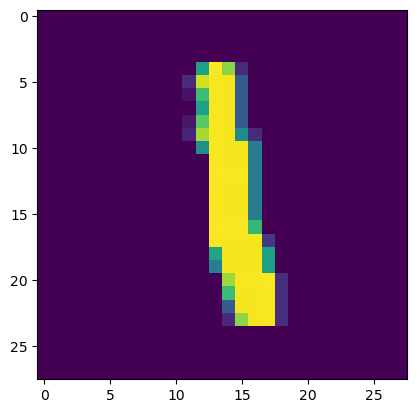

In [763]:
plt.imshow(X_train[3])

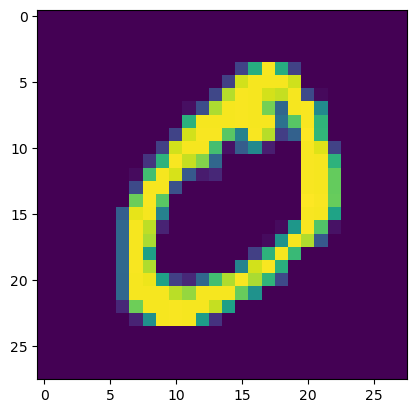

In [764]:
plt.imshow(X_train[0])

# MNIST Data Information

In [765]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (18507, 28, 28)
Y_train: (18507,)
X_test:  (3097, 28, 28)
Y_test:  (3097,)


# Normalize the Images

In [766]:
X_train = X_train/255.0
X_test = X_test/255.0

In [767]:
X_train[1].shape

(28, 28)

# Flattening the Input

In [768]:
def flattenInput(mat):
        mat = mat.flatten()
        mat = mat.reshape(mat.shape[0],1)
        return mat

# Weight Initialization(Random,Normalized)

In [769]:
def weightInitialization(rows , cols, type = "random"):
    if(type == "random"):
        initialWeights = np.random.random(size = (rows,cols))
    else:
        initialWeights = np.random.normal(size = (rows,cols))
    
    initialWeights = initialWeights.reshape(rows,cols)
    return initialWeights

In [770]:
#weights = weightInitialization(784,20,"random")
# weights1stLayer = weightInitialization(784,10,"normalize")
# weights2ndLayer = weightInitialization(10,1,"normalize")

In [771]:
weights.shape

(784, 10)

# Manipulating the Array

In [772]:
def manipulatingTheArray(mat):
    mat = flattenInput(mat)
    
    for index in range(mat.shape[0]):    
        if mat[index] < 0.2:
            mat[index] = -1
    return mat

# Thresholding Weight

* function   : Thesholding 
* prameters  : matrix
* return     : updated matrix
* Description : check if the value in the matrix is above or below certain thresholds.
                (e.g for the below function- if greater than 0.8 , values should remain same
                                             if between 0.5 and 0.8 , value equals 0.5
                                             if between 0.1 and 0.5 , value equals 0.3
                                             else value equals 0.1)
* 4.Points to remember : The thresholding values are hard coded. To make the code more suitable for different values ,   we can change the function parameters and pass thresholding values as well to the funtion.|

In [773]:
def Thresholding(out):
    for item in range(out.shape[1]):
        if out[0][item] >= 0.8:
            out[0][item] = 0.8
        elif out[0][item] >= 0.5 and out[0][item] < 0.8:
            out[0][item] = 0.5
        elif out[0][item] > 0.1 and out[0][item] < 0.5:
            out[0][item] = 0.3
        else:
            out[0][item] = 0.1
    return out

# Activation Value Thresholding

* This is similiar to the above funtion (thresholding function)
* Parameters  : Matrix
* Description : same as the Thresholding function. (Thresholding values are different).

In [774]:
def ActThresholding(out):
    for item in range(out.shape[1]):
        if out[0][item] >= 0.9:
            out[0][item] = 0.9
#         else:
#             out[0][item] = 0.1
    return out

# Threshold Check

* function    : crossThreshold
* parameters  : matrix
* return      : matrix
* Description : checks if the value in the matrix is greater than a certain threshold , set the value as 0 if not then do the leaking

In [775]:
def crossThreshold(out,thresholdVal,leakingVal):
   
    for item in range(out.shape[1]):
        if out[0][item] >= 0.09:
            out[0][item] = 0.09
        elif out[0][item] >=0.09 and out[0][item] <= 0.02:
            output[0][item] = 0.07
        else:
            out[0][item] = out[0][item] - leakingVal

    return out

# Weight Threshold (Future Reference)
* function    : weightThreshold
* parameters  : matrix
* return      : matrix
* Description : if the values in the matrix are less 0 , set it at 0

In [776]:
def weightThreshold(weight):
    for item in range(weight.shape[1]):
        if weight[0][item] <= 0:
            weight[0][item] = 0
    
    return weight
            

In [777]:
def weightThresholdAfterTraining(weight):
    for x in range(weight.shape[0]):
        for y in range(weight.shape[1]):
            if weight[x][y] <= 0:
                weight[x][y] = 0
    
    return weight

# Print Results
* function : printResults
* parameters : input Image matrix , weight Matrix (final)
* return : result
* Description : It does matrix dot product of the flattened image and the final weight matrix

In [778]:
def printResults(inputImage,finalWeight):
    result = []
    for item in inputImage:
        item = flattenInput(item)
        #item = manipulatingTheArray(item)
        result.append(np.dot(item.T,finalWeight))
    return result

In [779]:
def printResultsWithExtraLayer(inputImage, weight1,weight2):
    result = []
    for item in inputImage:
        item = flattenInput(item)
        out1 = np.dot(item.T,weight1)
        out2 = np.dot(out1,weight2)
        result.append(out2)
    return result

# Flattens the test Image

In [780]:
testFlatten = []

for image_ in X_test:
        image_ = flattenInput(image_)
        testFlatten.append(image_)




# Weight Update

In [781]:
def weightUpateContainingExtraLayer(epoch,iteration,inputImage,weight1,weight2):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = [] # empty list
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)
    out1 = np.zeros(10)
    out2 = np.zeros(1)
    alpha =1e-4
    beta = 1e-5
    thresholdVal = 0.7
    leakingVal = 0.1
    outArray = []
    for epoch_ in range(epoch):
        print(epoch_)
        outEpoch = []
        for input_ in flattenImage:
                out1 = alpha * np.dot(input_.T , weight1) + out1
#                 print(out1.shape)
#                 print(weight2.shape)
                out1 = crossThreshold(out1,thresholdVal,leakingVal)
                out2 = alpha * np.dot(out1,weight2) + out2
                #out = ActThresholding(out)
                out1 = crossThreshold(out1,thresholdVal,leakingVal)
                inputM = manipulatingTheArray(input_)
                weight1 = weight1 + beta * np.dot(inputM,out1)
#                 print(out1.shape)
#                 print(out2.shape)
                out1 = ActThresholding(out1)
                weight2 = weight2 + beta * np.dot(out1.T,out2)
                
#                 weight1 = weightThreshold(weight1)
#                 weight2 = weightThreshold(weight2)
                out = crossThreshold(out,thresholdVal,leakingVal)
                #outEpoch.append(out)
        out1 = np.zeros(10)
        out2 = np.zeros(10)
        #outArray.append(outEpoch)
    return weight1,weight2

In [782]:
# Notes
# Print the values of out and set the threshold values accordingly
# Check with different values manipulating Array, weightthreshold,crossthreshold
weights1stLayer = weightInitialization(784,10,"random")
weights2ndLayer = weightInitialization(10,10,"random")

In [784]:
weight1 , weight2 = weightUpateContainingExtraLayer(3,1,X_train,weights1stLayer,weights2ndLayer )

0
1
2


In [785]:
weight1 = weightThresholdAfterTraining(weight1)
weight2 = weightThresholdAfterTraining(weight2) # This is ok after training

In [786]:
weight1

array([[0.33769606, 0.19458191, 0.        , ..., 0.20758817, 0.17421915,
        0.45799482],
       [0.05528521, 0.45845571, 0.12406731, ..., 0.49037941, 0.        ,
        0.        ],
       [0.49527852, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.39462441, 0.31163723, 0.21261805, ..., 0.27153072, 0.47355143,
        0.        ],
       [0.06410029, 0.06980245, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03364246, 0.        , ..., 0.14528464, 0.32893786,
        0.31152154]])

In [787]:
weight2

array([[11.29054376,  8.86603415,  9.2015741 ,  7.05330824, 10.85792266,
        10.048679  , 10.89271142,  9.43728174, 12.33976077, 10.65176109],
       [10.87941769,  9.28264459,  9.47680653,  7.8936989 , 10.01577037,
         9.50095853, 10.87941114,  9.09690499, 12.5590169 , 10.41723522],
       [10.89289589,  8.46081556,  8.97651999,  7.11587825, 10.11611011,
         9.38113151, 10.79915508,  8.90730874, 12.70852307, 10.19456739],
       [11.00934974,  8.4887369 ,  9.8257651 ,  7.03394542, 10.24171241,
         9.56493428, 10.81023763,  9.00349125, 12.39094461, 10.11210815],
       [10.76444863,  8.86834836,  8.97903378,  7.30952733, 10.89145694,
         9.86523405, 11.16730077,  9.12879451, 12.81239935, 10.59838361],
       [10.98444588,  8.8604144 ,  9.53092857,  7.6756371 , 10.20385657,
         9.3679588 , 10.7886715 ,  9.27339538, 12.0750476 , 10.24457742],
       [11.32369404,  9.28675553,  9.68253508,  7.29320538, 10.92730198,
         9.78106792, 10.71856993,  8.96087655

In [788]:
# finalWeight = weightThresholdAfterTraining(finalWeight)
results = printResultsWithExtraLayer(X_train, weight1,weight2)

In [789]:
# Make sure the weights positve greater than 0
# (-1,1) reference 
# weight range (0,1) ---> 1st check and try to make sure it stays between these values.
# if it does not happen , then go for (-1,1) before that check the thresholding functions and out

# try getting above 95 percentage.

# if not possible , try adding hidden layers and check

In [790]:
#results=printResults(X_train,finalWeight)

In [791]:
#results

* calculating average value from result matrix.

In [792]:
resultsAvg = []
for item in range(len(results)):
    resultsAvg.append(np.median(results[item]))

In [793]:
np.unique(Y_train)

array([0, 1, 4], dtype=uint8)

* Storing the indices of the image in y_train corresponding to 0,1,2,3,4

In [794]:
res0 = []
res1 = []
res4 = []

index = 0

for item in Y_train: 
    if item == 0:
        res0.append(index)
    elif item == 1:
        res1.append(index)
    elif item == 4:
        res4.append(index)
    index += 1
        

# Checking the values of Zeros

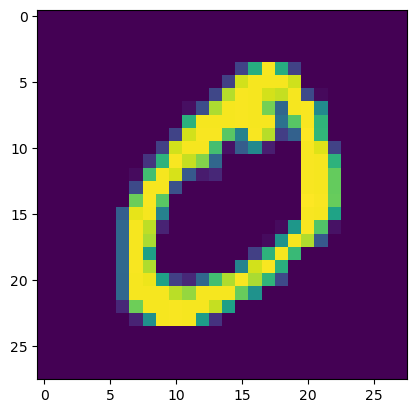

In [795]:
plt.imshow(X_train[res0[0]])

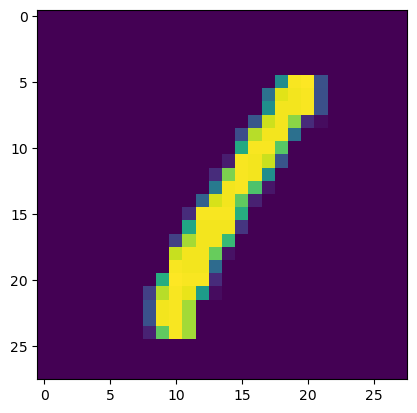

In [796]:
plt.imshow(X_train[res1[0]])

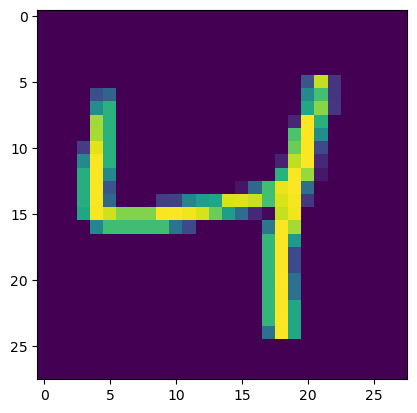

In [797]:
plt.imshow(X_train[res4[0]])

# Storing the index of the images

* function : storingIndexes
* parameters : passing list containing indices of the image 0,1,2,3,4
* return : values corresponding to those indices(image)

In [798]:

def storingIndexes(res0,res1,res4):
    result0 = []
    result1 = []
    result4 = []
    
    for index in res0:
        result0.append(resultsAvg[index])
    
    for index in res1:
        result1.append(resultsAvg[index])
        
    for index in res4:
        result4.append(resultsAvg[index])
    
    return result0,result1,result4
        

In [799]:
result0 , result1 , result4 =storingIndexes(res0,res1,res4)

In [800]:
# result0 = [np.squeeze(arr) for arr in result0]
# result1 = [np.squeeze(arr) for arr in result1]
# result4 = [np.squeeze(arr) for arr in result4]
#result0

In [801]:
def plotResults(res):
    plt.plot(res)
    plt.ylim(0,1)
    plt.show()

In [802]:
#plotResults(result0)

(array([  8.,   7.,  16.,  22.,  44.,  49.,  88., 113., 142., 196., 198.,
        232., 281., 339., 347., 339., 344., 370., 336., 339., 300., 291.,
        298., 210., 191., 152., 132., 117.,  96.,  75.,  67.,  46.,  38.,
         23.,  18.,  22.,  10.,   7.,   5.,   4.,   4.,   0.,   1.,   2.,
          1.,   2.,   0.,   0.,   0.,   1.]),
 array([ 1636.133045  ,  1811.1005648 ,  1986.0680846 ,  2161.0356044 ,
         2336.0031242 ,  2510.970644  ,  2685.9381638 ,  2860.9056836 ,
         3035.87320341,  3210.84072321,  3385.80824301,  3560.77576281,
         3735.74328261,  3910.71080241,  4085.67832221,  4260.64584201,
         4435.61336181,  4610.58088161,  4785.54840141,  4960.51592121,
         5135.48344101,  5310.45096081,  5485.41848061,  5660.38600041,
         5835.35352021,  6010.32104001,  6185.28855981,  6360.25607961,
         6535.22359941,  6710.19111922,  6885.15863902,  7060.12615882,
         7235.09367862,  7410.06119842,  7585.02871822,  7759.99623802,
         7

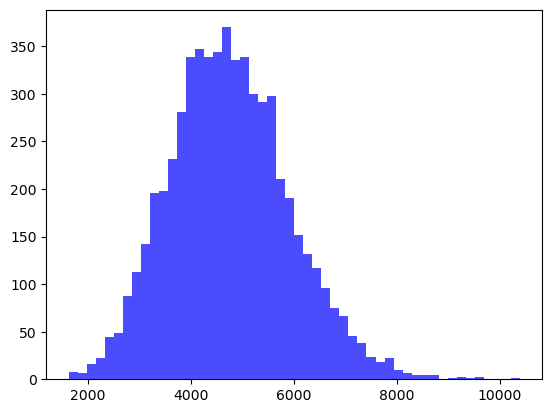

In [803]:
plt.hist(result0, bins=50, color='blue', alpha=0.7) 

In [804]:
#plotResults(result1)

(array([  4.,  14.,  23.,  44.,  68., 131., 210., 258., 311., 379., 454.,
        475., 485., 491., 473., 453., 386., 381., 291., 292., 229., 190.,
        153., 112., 103.,  76.,  54.,  43.,  44.,  25.,  23.,  19.,  16.,
         10.,   4.,   1.,   4.,   8.,   2.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 912.98042576, 1029.9548613 , 1146.92929683, 1263.90373236,
        1380.87816789, 1497.85260342, 1614.82703896, 1731.80147449,
        1848.77591002, 1965.75034555, 2082.72478109, 2199.69921662,
        2316.67365215, 2433.64808768, 2550.62252322, 2667.59695875,
        2784.57139428, 2901.54582981, 3018.52026534, 3135.49470088,
        3252.46913641, 3369.44357194, 3486.41800747, 3603.39244301,
        3720.36687854, 3837.34131407, 3954.3157496 , 4071.29018513,
        4188.26462067, 4305.2390562 , 4422.21349173, 4539.18792726,
        4656.1623628 , 4773.13679833, 4890.11123386, 5007.08566939,
        5124.06010493, 5241.03454046, 5358.008

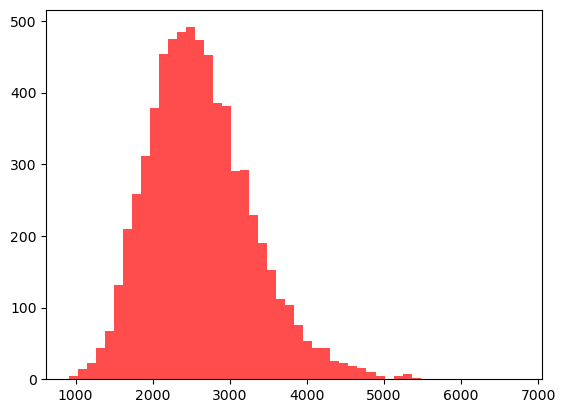

In [805]:
plt.hist(result1, bins=50, color='red', alpha=0.7) 

In [806]:
#plotResults(result4)

(array([  5.,  10.,  24.,  40.,  42.,  83.,  94., 132., 189., 234., 258.,
        294., 335., 328., 309., 339., 313., 320., 298., 294., 243., 256.,
        260., 201., 176., 135., 135., 108.,  85.,  77.,  52.,  35.,  32.,
         30.,  20.,  13.,  10.,   4.,   6.,   7.,   7.,   1.,   2.,   2.,
          0.,   1.,   1.,   0.,   0.,   2.]),
 array([1403.37062624, 1529.44093963, 1655.51125302, 1781.58156641,
        1907.65187981, 2033.7221932 , 2159.79250659, 2285.86281998,
        2411.93313338, 2538.00344677, 2664.07376016, 2790.14407356,
        2916.21438695, 3042.28470034, 3168.35501373, 3294.42532713,
        3420.49564052, 3546.56595391, 3672.6362673 , 3798.7065807 ,
        3924.77689409, 4050.84720748, 4176.91752087, 4302.98783427,
        4429.05814766, 4555.12846105, 4681.19877445, 4807.26908784,
        4933.33940123, 5059.40971462, 5185.48002802, 5311.55034141,
        5437.6206548 , 5563.69096819, 5689.76128159, 5815.83159498,
        5941.90190837, 6067.97222177, 6194.042

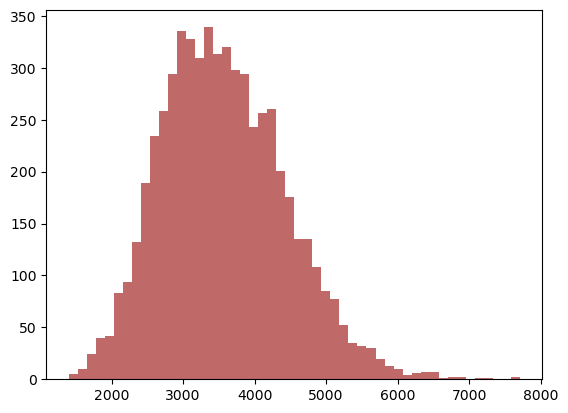

In [807]:
plt.hist(result4, bins=50, color='brown', alpha=0.7) 

In [808]:
def calculateResult(data,finalWeight):
        predict = []
        for item in data:
            item = flattenInput(item)
            res = np.dot(item.T,finalWeight)
            res = np.median(res)
            predict.append(res)
        return predict

In [809]:
def calculateResultExtraLayer(data,weight1,weight2):
        predict = []
        for item in data:
            item = flattenInput(item)
            out1 = np.dot(item.T,weight1)
            out2 = np.dot(out1,weight2)
            res = np.median(out2)
            predict.append(res)
        return predict

In [810]:
from scipy.stats import norm

In [811]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = 0
    accuracy = 0
    for true, predicted in zip(y_true, y_pred):
        if true == predicted:
            correct_predictions += 1
            accuracy = correct_predictions/len(y_true)
    return accuracy*100

In [812]:
# Calculate the probability densities under each distribution
result = calculateResultExtraLayer(X_test,weight1,weight2)
prediction = []
for value in result:
    pdf1 = norm.pdf(value, loc=np.mean(result0), scale=np.std(result0))
    pdf2 = norm.pdf(value, loc=np.mean(result1), scale=np.std(result1))
    pdf3 = norm.pdf(value, loc=np.mean(result4), scale=np.std(result4))

# Determine which distribution the value most likely belongs to
    if pdf1 > pdf2 and pdf1 > pdf3:
        prediction.append(0)
    elif pdf2 > pdf1 and pdf2 > pdf3:
        prediction.append(1)
    else:
        prediction.append(4)

In [813]:
accuracy = compute_accuracy(Y_test,prediction)

In [814]:
accuracy

63.38391992250565

In [815]:
#*************************************************
# random ---> median ---> 69.8 ----> 3
# normalize ----> median ---> 44.04 ---->3
# random ---> mean ---> 69.7 -----> 3
# normalize ---> median ---> 63.254 --->10
# random -----> median ----> 68.2 ----> 10

# Above observation for output neuon equals 20
#*************************************************
# random -----> median ----> 67.06 ----> 10
# random -----> mean -----> 65.87 ---->10
# normalize ---> mean -----> 55.92 ----> 10
# normalize --->median -----> 48.01 ---->10

# Above observation for output neuon equals 3
#*************************************************
# normalize ----> median -----> 76.5 ----> 10 --> 1st time
# normalize ----> median -----> 71.68 ----> 10 --> 2nd Time
#*************************************************
# normalize ----> median ----->69.03 ----> 10 ----->weightThresholding after epoch ---> 0.9(Threshold),0.1(Leaking)
# normalize ----> median ----->68.4 ----> 10 ----->weightThresholding after epoch ---> 0.9(Threshold),0.1(Leaking), removed out threshold

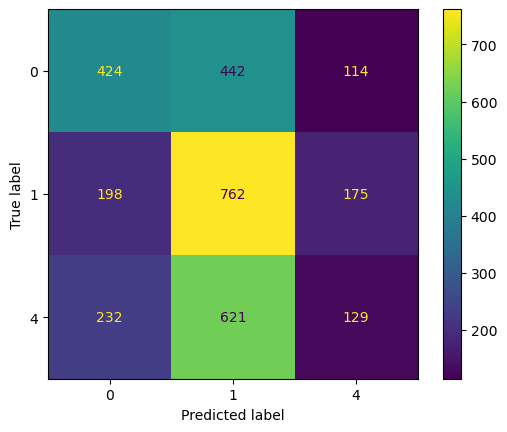

In [447]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(Y_test,prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1 ,4])

cm_display.plot()
plt.show()

In [228]:
np.min(result0)

820.6168923161749

In [229]:
np.max(result0)

9069.743417341037

* Returns min and max value in a list

In [230]:
def MaxMinResult(res):
    return np.min(res) , np.max(res)

In [233]:
min0 , max0 = MaxMinResult(result0)
min1 , max1 = MaxMinResult(result1)
min4 , max4 = MaxMinResult(result4)

In [234]:
print(min0)
print(max0)

820.6168923161749
9069.743417341037


In [235]:
print(min1)
print(max1)

124.88702314462651
4035.114572155578


In [236]:
print(min4)
print(max4)

358.7676893895287
7342.2584121915625


In [237]:
max_value = np.max(result0)
index = result0.index(max_value)
print(index)


4077


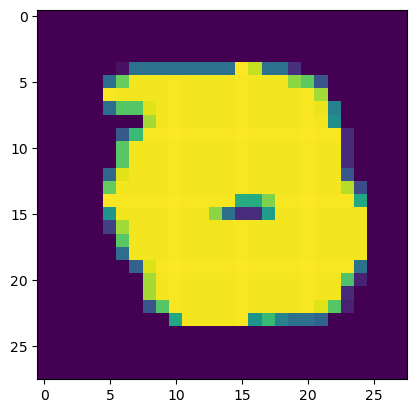

In [238]:
plt.imshow(X_train[res0[4077]])

In [239]:
max_value = np.min(result0)
index = result0.index(max_value)
print(index)


3707


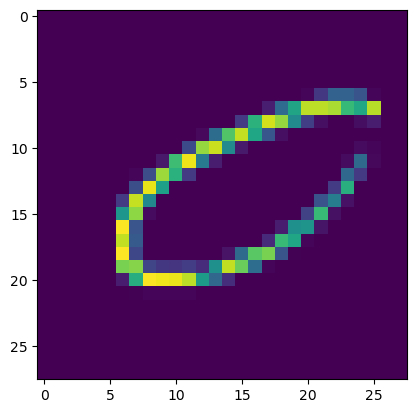

In [240]:
plt.imshow(X_train[res0[3525]])

In [241]:
np.mean(np.dot(testFlatten[0].T,finalWeight))

300.2028669737775

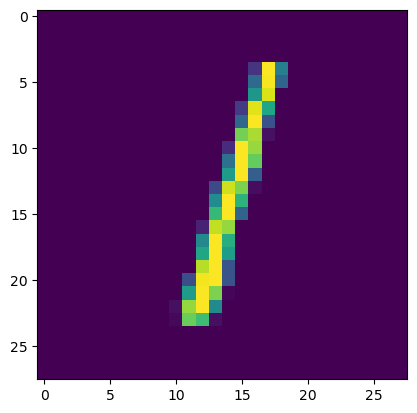

In [242]:
plt.imshow(X_test[0])

In [243]:
np.mean(np.dot(testFlatten[3].T,finalWeight))

420.13239328502254

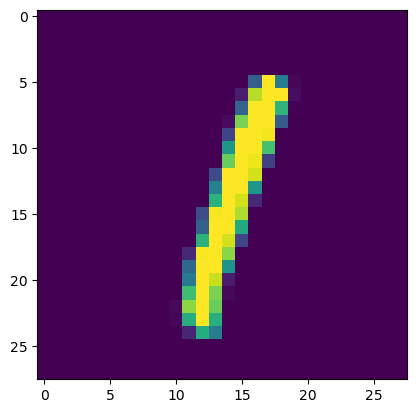

In [244]:
plt.imshow(X_test[3])

# Problem

1. Proper Encoding of the MNIST Data is required
2. Check the algorithm for previous data
    - The weight values are increasing
3. Thresholding on weights
4. If weights are increasing then the output will be increasing , we have to work on the the weight clipping.
5. Epochs 10
6. Digits 0-5 (20 output neurons)

In [245]:
def weightUpdate(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
            for input_ in flattenImage:
                input_ = manipulatingTheArray(input_)
                for iteration_ in range(iteration):
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    #manipulatedinput = manipulatingTheArray(input_)
                    weight = weight + np.dot(input_, out)
                print(out)
            

In [246]:
weightUpdate(1,1,X_train,weights)

NameError: name 'thresholding' is not defined

# Experimenting with the Weight Update Function 

1. Without Thresholding

In [77]:
def weightUpdateNoThresholding(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
            for input_ in flattenImage:
                for iteration_ in range(iteration):
                    out = np.dot(input_.T , weight)
                    mInput = manipulatingTheArray(input_)
                    weight = weight + np.dot(mInput, out)
                print(out)
    
    #return weight

In [80]:
#weightUpdateNoThresholding(1,10,X_train,weights)

2. No Input Manipulation

In [81]:
def weightUpdateNoInputManipulation(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
            for input_ in flattenImage:
                for iteration_ in range(iteration):
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    weight = weight + np.dot(input_, out)

    return weight

In [83]:
finalWeights = weightUpdateNoInputManipulation(1,10,X_train,weights)

In [85]:
printResults(X_train,finalWeights)

[array([[9952981.9776312 , 9952983.78771774, 9952980.22546172,
         9952984.17954997, 9952979.62129831, 9952983.39618329,
         9952984.12277677, 9952978.30823085, 9952977.73184416,
         9952980.29404787, 9952981.81693666, 9952978.96837344,
         9952982.51001832, 9952984.30400523, 9952986.40933317,
         9952980.39956972, 9952981.34806903, 9952978.70548629,
         9952983.84226781, 9952980.82762274]]),
 array([[4411007.2184424 , 4411010.05153546, 4411008.07675292,
         4411007.48091497, 4411005.18366287, 4411007.69902311,
         4411008.45580176, 4411005.91641389, 4411009.47492531,
         4411012.58481127, 4411007.2804175 , 4411008.07541623,
         4411008.01839292, 4411010.98324115, 4411010.77982822,
         4411009.52036677, 4411013.13197226, 4411008.80886294,
         4411007.73641599, 4411004.83176408]]),
 array([[6388741.87790482, 6388748.81913613, 6388745.38822244,
         6388746.8537067 , 6388741.0350559 , 6388747.00410496,
         6388742.58585

3. Do combined Iteration for every image

In [86]:
def weightUpdateCombinedIterationForEveryImage(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
        for iteration_ in range(iteration):
            for input_ in flattenImage:
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    weight = weight + np.dot(input_, out)

    return weight

In [88]:
finalWeights = weightUpdateCombinedIterationForEveryImage(1,100,X_train,weights)

In [594]:
#printResults(X_train,finalWeights)

4. Changing the input to 0 to -1

In [595]:
def weightUpdateCombinedIterationForEveryImage(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
        for iteration_ in range(iteration):
            for input_ in flattenImage:
                    input_ = manipulatingTheArray(input_)
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    weight = weight + np.dot(input_, out)

    return weight

In [596]:
finalWeight = weightUpdateCombinedIterationForEveryImage(3,10,X_train,weights)

NameError: name 'thresholding' is not defined

In [597]:
for item in inputImage:
    item = flattenInput(item)
    item = manipulatingTheArray(item)
    print(np.dot(item.T,finalWeight))

NameError: name 'inputImage' is not defined

In [57]:
finalWeight

array([[ 69.39000612,  68.04254974,  69.43624434,  69.21410972],
       [ 27.32086988,  27.73503806,  27.14569411,  27.62237861],
       [ 69.59175721,  67.63236573,  69.84716618,  69.13499989],
       [-26.91268329, -26.00519731, -26.88039291, -26.61352704],
       [ 27.07747724,  27.15349475,  27.58290186,  27.71552529],
       [ 21.88294213,  19.82698269,  21.19890101,  21.59518935],
       [-26.19324792, -25.02202828, -26.97153446, -26.72172794],
       [-20.80487026, -19.01843236, -20.95428235, -20.61819169],
       [ 69.94875543,  67.68330195,  69.2727027 ,  69.93041008]])